In [3]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
(X_train,Y_train),(X_test,Y_test) = keras.datasets.mnist.load_data()

In [5]:
len(X_train)

60000

In [6]:
len(X_test)

10000

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [8]:
X_train[0].shape

(28, 28)

In [9]:
plt.matshow(X_train[2])

In [10]:
Y_train[2]

4

## Going to flatten our data set

In [12]:
X_trainFlatten =X_train.reshape(-1, 28*28) / 255.0

In [13]:
X_testFlatten = X_test.reshape(-1, 28*28) / 255.0

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_trainFlatten, Y_train, epochs=5)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8100 - loss: 0.7193
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9140 - loss: 0.3109
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9206 - loss: 0.2864
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9262 - loss: 0.2674
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9243 - loss: 0.2661


In [15]:
model.evaluate(X_testFlatten, Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9165 - loss: 0.2992


[0.2648865580558777, 0.9273999929428101]

In [16]:
y_predicted = model.predict(X_testFlatten)
y_predicted[1]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([3.4045377e-01, 7.4351965e-03, 9.9944448e-01, 3.2746783e-01,
       6.9345529e-10, 8.4732294e-01, 8.9839941e-01, 1.3021228e-12,
       1.7441450e-01, 1.7272606e-09], dtype=float32)

In [17]:
plt.matshow(X_test[0])

In [18]:
model.predict(X_testFlatten[:1])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step


array([[1.5361799e-02, 3.1939206e-07, 6.7396663e-02, 9.5512831e-01,
        1.9908878e-03, 1.0541193e-01, 2.3087221e-06, 9.9977630e-01,
        9.7329900e-02, 6.7198128e-01]], dtype=float32)

In [19]:
np.argmax(y_predicted[0])

7

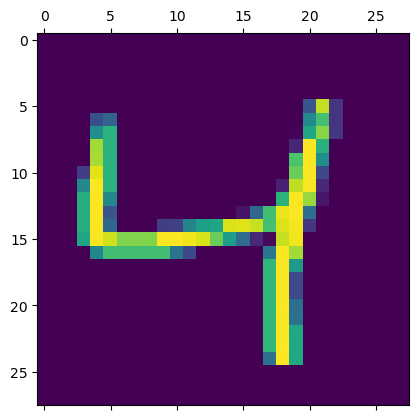

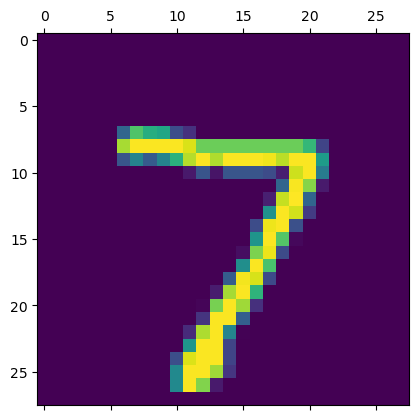

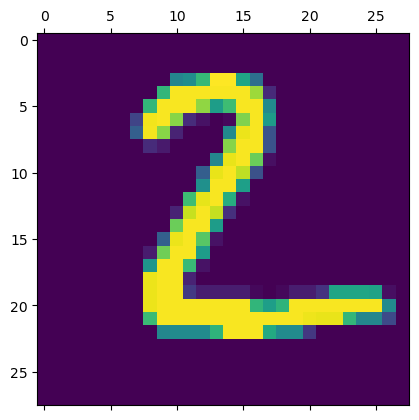

In [20]:
plt.matshow(X_test[1])
plt.show()

In [21]:
np.argmax(y_predicted[1])

2

In [22]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]

In [23]:

y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [24]:
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 950,    0,    3,    2,    0,    5,   13,    3,    3,    1],
       [   0, 1111,    3,    2,    0,    1,    4,    2,   12,    0],
       [   3,    9,  929,   14,    8,    3,   13,   10,   39,    4],
       [   1,    0,   23,  913,    0,   26,    2,   13,   25,    7],
       [   1,    1,    5,    1,  919,    0,   12,    4,   10,   29],
       [   7,    3,    2,   26,   11,  779,   16,    7,   35,    6],
       [   6,    3,    3,    1,    7,   10,  924,    2,    2,    0],
       [   1,    5,   24,    2,    6,    0,    0,  964,    3,   23],
       [   4,    7,    7,   16,    9,   20,   10,   12,  882,    7],
       [   8,    7,    1,    9,   31,    7,    1,   32,   10,  903]])>

In [25]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

Text(95.72222222222221, 0.5, 'Truth')

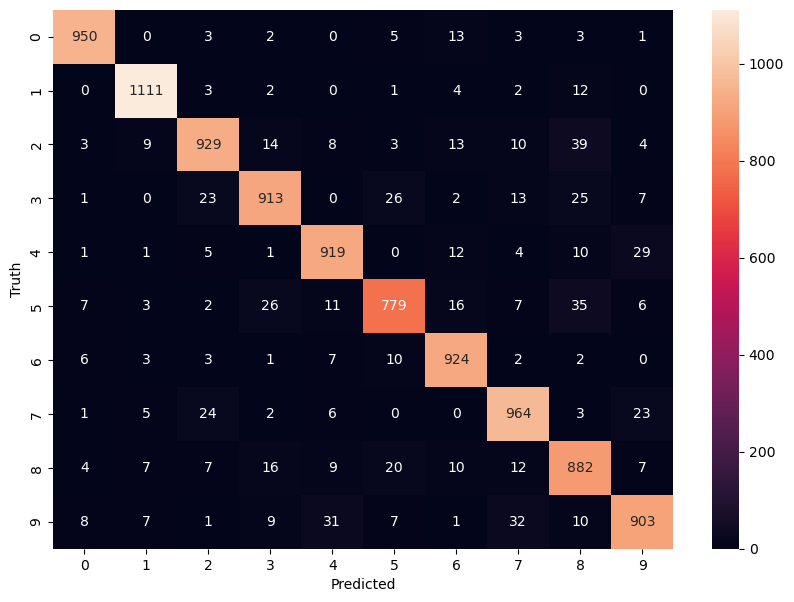

In [26]:
plt.show()

In [27]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_trainFlatten, Y_train, epochs=5)

C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.8706 - loss: 0.4532
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.9623 - loss: 0.1265
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9737 - loss: 0.0865
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.9811 - loss: 0.0634
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9860 - loss: 0.0476


In [28]:
model.evaluate(X_testFlatten,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9704 - loss: 0.0952


[0.08211313188076019, 0.9746000170707703]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


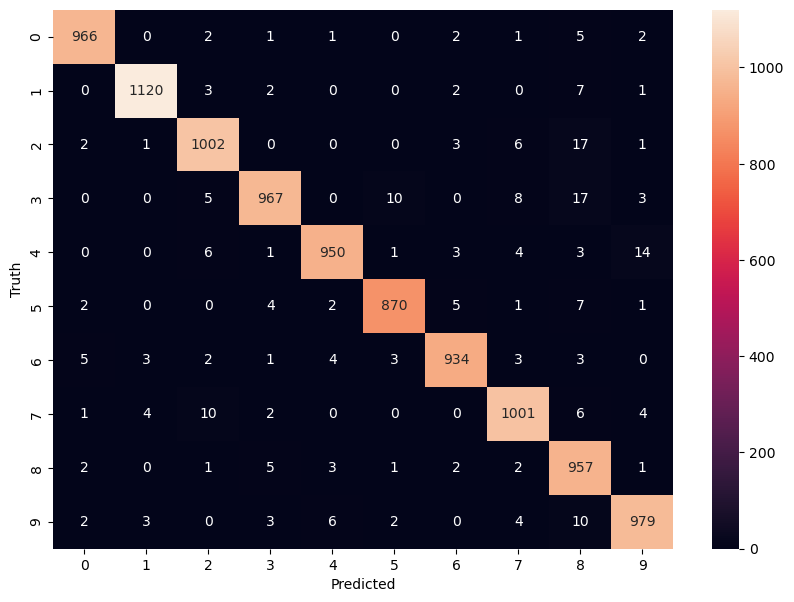

In [29]:
y_predicted = model.predict(X_testFlatten)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=Y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()

In [30]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=10)

Epoch 1/10


C:\Users\hp\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.4829 - loss: 7.0465
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 5ms/step - accuracy: 0.6199 - loss: 0.4143
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.5709 - loss: 0.3032
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5256 - loss: 0.2549
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.4922 - loss: 0.2294
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.4647 - loss: 0.2096
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4407 - loss: 0.1991
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 5ms/step - accuracy: 0.4376 - loss: 0.1954
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.4000 - loss: 0.1850
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.4129 - loss: 0.1848


In [31]:
model.evaluate(X_test,Y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4186 - loss: 0.2994


[0.2616787254810333, 0.4099999964237213]